In [67]:
import numpy as np
import pandas as pd
import sklearn.impute
import sklearn.neighbors 
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import neural_network
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, make_scorer

In [23]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [42]:
# Import Training Data
training_data= pd.read_csv("./Data/training_data.csv", sep=";", decimal=',')

# features and target split 
data_X = training_data.loc[:, training_data.columns != "Class"]
data_X = data_X.loc[:, data_X.columns != "Perform"]

data_Class = training_data.loc[:, "Class"]
data_Perform = training_data.loc[:,"Perform"]

# Take the names of only the numeric columns, i.e. columns other than group 
numeric_col =data_X.iloc[:,1:].columns # data without groups

# Scale the data 
scaler=preprocessing.StandardScaler()
data_X[numeric_col] = scaler.fit_transform(data_X[numeric_col])
data_X.head()

# Add Dummy Variables for Group
print(data_X.shape)
data_X = pd.get_dummies(data_X,"Group_",columns=["Group"])
print("after group dv")
print(data_X.shape)

(8000, 117)
after group dv
(8000, 127)


In [38]:
# Impute the data 
imp = sklearn.impute.KNNImputer(n_neighbors=3,weights = "uniform")

data_X = imp.fit_transform(data_X)
data_X

array([[ 0.06965696, -0.08098081, -0.08336017, ...,  0.        ,
         0.        ,  1.        ],
       [-0.86974872, -0.15629212, -0.15970118, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03466011, -0.13459499, -0.16082084, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.27579044, -0.09551734, -0.12325445, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.11603198, -0.08135393, -0.1323705 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.331014  , -0.09122743, -0.10620628, ...,  0.        ,
         0.        ,  0.        ]])

In [39]:
# Split Given Training Data to Test/Train Split 
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data_X, data_Class, test_size=0.25, random_state=30)

We split the test and train data with 3/4 train and 1/4 test data. 

In [40]:
# Basic kNN classifier without cross validation 
C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
C1.fit(X_train, Y_train)
C1.score(X_test, Y_test)


0.4235

In [28]:
C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
C1.fit(X_train, Y_train)
C1.score(X_test, Y_test)


0.4445

In [29]:
C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
C1.fit(X_train, Y_train)
C1.score(X_test, Y_test)


0.456

In [30]:
C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=50)
C1.fit(X_train, Y_train)
C1.score(X_test, Y_test)


0.471

In [33]:
C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=150)
C1.fit(X_train, Y_train)
print(C1.score(X_test, Y_test))



0.4755
hello


So we a really basic kNN Classifier we can only get around 50% accuracy, this may be do with the fact that I imputed values using KNN. So I'll try to repeat the process using a different impute method

In [38]:
# Impute the data 
imp = sklearn.impute.SimpleImputer(strategy="median")

data_X = imp.fit_transform(data_X)
data_X

# Split Given Training Data to Test/Train Split 
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data_X, data_Class, test_size=0.25, random_state=30)



In [42]:
# Basic kNN classifier without cross validation 
C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5)
C1.fit(X_train, Y_train)
print("N = 5 ")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights="distance")
C1.fit(X_train, Y_train)
print("N = 5 with distance")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
C1.fit(X_train, Y_train)
print("N = 10 ")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10, weights="distance")
C1.fit(X_train, Y_train)
print("N = 10 with distance")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
C1.fit(X_train, Y_train)
print("N = 15 ")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15, weights="distance")
C1.fit(X_train, Y_train)
print("N = 15 with distance")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=50)
C1.fit(X_train, Y_train)
print("N = 50 ")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=50, weights="distance")
C1.fit(X_train, Y_train)
print("N = 50 with distance")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=150)
C1.fit(X_train, Y_train)
print("N = 150 ")
print(C1.score(X_test, Y_test))

C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=150, weights="distance")
C1.fit(X_train, Y_train)
print("N = 150 with distance")
print(C1.score(X_test, Y_test))

N = 5 
0.418
N = 5 with distance
0.4375
N = 10 
0.4445
N = 10 with distance
0.4575
N = 15 
0.456
N = 15 with distance
0.462
N = 50 
0.471
N = 50 with distance
0.4795
N = 150 
0.4755
N = 150 with distance
0.478


Using weighted voting rather than uniform voting made a difference but only a small difference

Next I plan to do knn with cross validation and check different hyperparameters 

- num neighbors
- impute type

The procedure uses 5 fold CV


In [73]:
#Custom scorer 
def avg_err_cost(y_true, y_pred):
    # Define the desired rows
    row1 = [0, 1, 2]
    row2 = [1, 0, 1]
    row3 = [2, 1, 0]

    cost_matrix = np.array([row1, row2, row3]) 
    confu_matrix = confusion_matrix(y_true, y_pred)
    acc = 1 - np.sum(confu_matrix * cost_matrix)/len(y_true)
    return  acc

custom_scorer = make_scorer(avg_err_cost)

In [69]:
### Impute Data 
imp = sklearn.impute.SimpleImputer(strategy="median")
data_Xsimple = imp.fit_transform(data_X)
imp = sklearn.impute.KNNImputer(n_neighbors=3,weights = "uniform")
data_XkNN = imp.fit_transform(data_X)




In [74]:
# ### Make test/train split which is already done in this notebook

# # # features and target split 
# data_X = training_data.loc[:, training_data.columns != "Class"]
# data_X = data_X.loc[:, data_X.columns != "Perform"]

# data_Class = training_data.loc[:, "Class"]
# data_Perform = training_data.loc[:,"Perform"]



### Split Data
# X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(data_Xsimple, data_Class, test_size=0.25, random_state=30)

# Neighbors 
n_neighbors = [3,5,10,15,50,100,150,200]
imp_simple_means =[]

for neighbors in n_neighbors:
    C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=neighbors)
    scores = cross_val_score(C1, data_Xsimple, data_Class,cv=5, scoring=custom_scorer )
    print(f"Impute Simple with {neighbors} neighbors ")
    print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))
    imp_simple_means.append(scores.mean())


Impute Simple with 3 neighbors 
0.03563 accuracy with a standard deviation of 0.00670
Impute Simple with 5 neighbors 
0.04413 accuracy with a standard deviation of 0.00662
Impute Simple with 10 neighbors 
0.06212 accuracy with a standard deviation of 0.01143
Impute Simple with 15 neighbors 
0.08213 accuracy with a standard deviation of 0.00771
Impute Simple with 50 neighbors 
0.10100 accuracy with a standard deviation of 0.00840
Impute Simple with 100 neighbors 
0.10300 accuracy with a standard deviation of 0.01276
Impute Simple with 150 neighbors 
0.10200 accuracy with a standard deviation of 0.01732
Impute Simple with 200 neighbors 
0.09425 accuracy with a standard deviation of 0.01210


In [76]:
imp_knn_means =[]

for neighbors in n_neighbors:
    C1 = sklearn.neighbors.KNeighborsClassifier(n_neighbors=neighbors)
    scores = cross_val_score(C1, data_XkNN, data_Class,cv=5, scoring=custom_scorer )
    print(f"Impute Simple with {neighbors} neighbors ")
    print("%0.5f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))
    imp_knn_means.append(scores.mean())


Impute Simple with 3 neighbors 
0.03638 accuracy with a standard deviation of 0.00890
Impute Simple with 5 neighbors 
0.04663 accuracy with a standard deviation of 0.00498
Impute Simple with 10 neighbors 
0.05875 accuracy with a standard deviation of 0.00509
Impute Simple with 15 neighbors 
0.08012 accuracy with a standard deviation of 0.00920
Impute Simple with 50 neighbors 
0.10050 accuracy with a standard deviation of 0.01390
Impute Simple with 100 neighbors 
0.10375 accuracy with a standard deviation of 0.01364
Impute Simple with 150 neighbors 
0.09725 accuracy with a standard deviation of 0.01773
Impute Simple with 200 neighbors 
0.09100 accuracy with a standard deviation of 0.01148


In [46]:
imp_simple_means

[0.4266249999999999,
 0.42437500000000006,
 0.450125,
 0.46575,
 0.4795,
 0.4805,
 0.48,
 0.476125]

In [47]:
imp_knn_means

[0.42675,
 0.42575,
 0.4485,
 0.464625,
 0.47924999999999995,
 0.48087500000000005,
 0.477625,
 0.47450000000000003]

In [51]:
import seaborn as sns

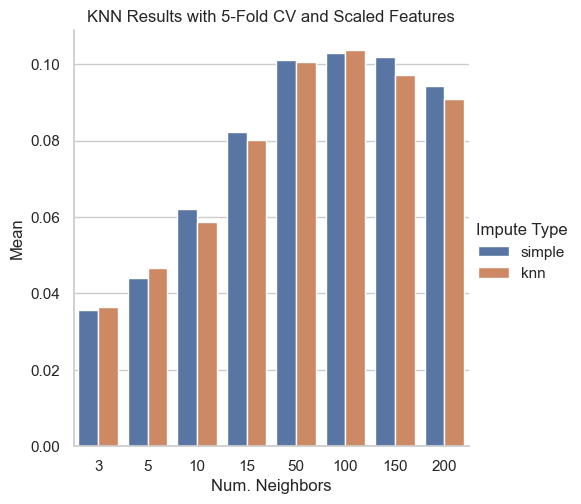

In [77]:
# Create Data Frame for visualization
knn_results = pd.DataFrame(data={
    "Mean" : imp_simple_means + imp_knn_means, 
    "Impute Type" : 8* ["simple"] + 8* ["knn"], 
    "Num. Neighbors" : 2 * n_neighbors
    })

knn_results.head()


sns.set_theme(style="whitegrid")

g = sns.catplot(data=knn_results, 
                kind="bar", 
                x="Num. Neighbors",
                y="Mean",
                hue="Impute Type")

g.set(title="KNN Results with 5-Fold CV and Scaled Features")


The Ideal number of neighbors seems to be somewhere between 50 and 200, since our accuracy of the tested values peaks around 100. We could also try rescaling the data.

Even after further experiments where I rescaled the data the improvement was only slight and again the knn imputed data performs better 

In [78]:
# Using the hueristic 
# 1 hidden layer with n = mean(#inputs, #outputs) neurons 
data_X.shape


(8000, 127)

In [ ]:
clf = neural_network.MLPClassifier()

In [37]:
# Need to Deal with NA/missing values 
# imp = sklearn.impute.KNNImputer(n_neighbors=3,weights = "uniform")

# training_data2 = imp.fit_transform(training_data)
# training_data.isna()
# np.where(pd.isnull(training_data))
# np.where(pd.isnull(training_data))



In [80]:
y_true = [1,1,0,-1,-1,1]
y_pred = [1,0,1,0,0,-1]

confusion_matrix(y_true, y_pred,)

array([[0, 2, 0],
       [0, 0, 1],
       [1, 1, 1]])